# Final Project Proposal: The Yield Curve as an Accurate Predictor of Economic Crises.
---

**By: Juan A. Javier** <br> **Class: Data Bootcamp**

## Introduction

The Yield Curve, measured as a difference in interest rates between short-term and long-term Treasuries, has long been thought of as an instrument to determine future economic conditions. More specifically, when the curve inverts (short-term Treasuries are yielding more than long-term Treasuries), it is interpreted as a sign that an economic recession will soon hit. This project will use data from [FRED](https://fred.stlouisfed.org) containing information on the Yield Curve and different economic indicators to gauge whether the Curve has accurately predicted crises.

This project will contain the following three sections:

1. Data on the following economic indicators from January 1982 to March 2019: Civilian Unemployment Rate, Motor Vehicle Retail Sales (Domestic Autos), Industrial Production Index, and the Effective Federal Funds Rate. Here the project will use statistics (e.g. growth rates, normalizing, etc.) on the indicators to find dates when the the indicators reflected recessionary periods.  


2. Graphics plotting the four indicators and labels reflecting a Yield Curve inversion as well as periods of a pronounced economic decline. Ideally the dates of inversion are soon followed by periods where the economic indicators show an economic decline. This would illustrate that the Yield Curve serves as a predictor of economic crises.


3. Five normalized graphics showing how the economic indicators behave following an inversion in the Yield Curve. Each individual graphic will represent the five times it has inverted from January 1982 to March 2019.

## Data Report

As already noted, the data on the Yield Curve and the four economic indicators will be sourced from FRED for a 37 year period. The variables are defined in the following way by FRED:

* [Yield Curve](https://fred.stlouisfed.org/series/T10Y3M): "spread between 10-Year Treasury Constant Maturity and 3-Month Treasury Constant Maturity"


* [Civilian Unemployment Rate](https://fred.stlouisfed.org/series/UNRATE): "The unemployment rate represents the number of unemployed as a percentage of the labor force. Labor force data are restricted to people 16 years of age and older, who currently reside in 1 of the 50 states or the District of Columbia, who do not reside in institutions (e.g., penal and mental facilities, homes for the aged), and who are not on active duty in the Armed Forces."


* [Motor Vehicle Retail Sales (Domestic Autos)](https://fred.stlouisfed.org/series/DAUTOSA): "Autos are all passenger cars, including station wagons. Domestic sales are all United States (U.S.) sales of vehicles assembled in the U.S., Canada, and Mexico."


* [Industrial Production Index](https://fred.stlouisfed.org/series/INDPRO): "The Industrial Production Index (INDPRO) is an economic indicator that measures real output for all facilities located in the United States manufacturing, mining, and electric, and gas utilities (excluding those in U.S. territories)."


* [Effective Federal Funds Rate](https://fred.stlouisfed.org/series/FEDFUNDS): "The federal funds rate is the interest rate at which depository institutions trade federal funds (balances held at Federal Reserve Banks) with each other overnight."

Now I will run through the process to grab the files using Datareader and create two dataframes: one with the Yield Curve data on it from January 1982 to March 2019 and another with all the economic indicators for the same dates.

**Packages Needed**

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

import datetime as dt

import numpy as np  

from pandas_datareader import data

**Grabbing Data Using Datareader**

In [2]:
codes1 = ["T10Y3M"]

yield_curve = data.DataReader(codes1, "fred", 1982)

In [3]:
codes2 = ["UNRATE", "DAUTOSA", "INDPRO", "FEDFUNDS"]

economic_indicators = data.DataReader(codes2, "fred", 1982)

**Renaming For Convenience**

In [4]:
yield_curve.rename(columns = {'T10Y3M': 'Yield'}, inplace = True)
economic_indicators.rename(columns = {'UNRATE': 'Unemployment_Rate', 
                                      'DAUTOSA': 'Vehicle_Sales',
                                     'INDPRO': 'Industrial_Production',
                                     'FEDFUNDS': 'Fed_Funds'}, inplace = True)

**Dates With Curve Inversion**

In [5]:
yield_curve_inversion = yield_curve.loc[yield_curve['Yield'] < 0]

In [6]:
yield_curve_inversion.head()

,Yield
DATE,
1982-02-01,-0.19
1982-02-02,-0.02
1982-02-08,-0.16
1982-02-10,-0.07
1982-02-11,-0.35


**Grouping By Year**

In [7]:
yield_curve_inverted = yield_curve_inversion.groupby([yield_curve_inversion.index.year,
                                                      yield_curve_inversion.index.month])

In [8]:
inverted_yield_curve = yield_curve_inverted.agg({"Yield": "mean"})

**Finalized Dataframes**

In [9]:
inverted_yield_curve

Yield
DATE DATE          
1982 2    -0.357500
1989 3    -0.010000
     5    -0.163333
     6    -0.157273
     7    -0.170625
     8    -0.105625
     10   -0.096667
     11   -0.078947
     12   -0.066875
1998 9    -0.062500
     10   -0.070000
2000 4    -0.045000
     7    -0.121333
     8    -0.451304
     9    -0.376000
     10   -0.556190
     11   -0.639048
     12   -0.696500
2001 1    -0.269231
     2    -0.030000
2006 1    -0.023333
     2    -0.038000
     3    -0.010000
     7    -0.058000
     8    -0.213913
     9    -0.211000
     10   -0.317143
     11   -0.478095
     12   -0.408500
2007 1    -0.345714
     2    -0.440526
     3    -0.515455
     4    -0.312857
     5    -0.143500
     7    -0.088750
     8    -0.110000
2019 3    -0.038000
     5    -0.030000

As we can see above, there are going to be five inversions from 1982 to 2019 that we will explore. The first ocurred in 1982, the second in 1989, the third in 1998, the fourth in 2000-2001, and the fifth in 2006-2007. I am going to exclude 2019 since the yield curve inverted late March and there is not much economic data for after the inversion date.

In [10]:
economic_indicators.head()

,Unemployment_Rate,Vehicle_Sales,Industrial_Production,Fed_Funds
DATE,,,,
1982-01-01,8.6,445.7,50.3043,13.22
1982-02-01,8.9,520.7,51.3016,14.78
1982-03-01,9.0,489.0,50.9104,14.68
1982-04-01,9.3,455.9,50.4627,14.94
1982-05-01,9.4,531.9,50.1380,14.45


Above we can see, the monthly number for the four economic indicators we are interested in from 1982 to 2019 is found within this dataframe. With it we can perform different analysis/statistics and create visuals.

## Statistics

One useful way to analyze the economic indicators is to view the montly growth rates.

In [11]:
economic_indicators['UR_Growth_Rate'] = economic_indicators['Unemployment_Rate'].pct_change()
economic_indicators['VS_Growth_Rate'] = economic_indicators['Vehicle_Sales'].pct_change()
economic_indicators['IP_Growth_Rate'] = economic_indicators['Industrial_Production'].pct_change()
economic_indicators['FF_Growth_Rate'] = economic_indicators['Fed_Funds'].pct_change()

In [34]:
economic_indicators.head()

,Unemployment_Rate,Vehicle_Sales,Industrial_Production,Fed_Funds,UR_Growth_Rate,VS_Growth_Rate,IP_Growth_Rate,FF_Growth_Rate
DATE,,,,,,,,
1982-01-01,8.6,445.7,50.3043,13.22,NaN,NaN,NaN,NaN
1982-02-01,8.9,520.7,51.3016,14.78,0.034884,0.168275,0.019825,0.118003
1982-03-01,9.0,489.0,50.9104,14.68,0.011236,-0.060880,-0.007625,-0.006766
1982-04-01,9.3,455.9,50.4627,14.94,0.033333,-0.067689,-0.008794,0.017711
1982-05-01,9.4,531.9,50.1380,14.45,0.010753,0.166703,-0.006434,-0.032798


Before proceeding, it would be good to conduct a first check on the relationship between the Yield Curve and the economy. To do this, I will create a dataframe which contains only the periods in which the growth rate was positive for the Unemployment Rate and Fed Funds, and negative for Vehicle Sales and Industrial Production.

In [35]:
negative_UR = economic_indicators.loc[(economic_indicators['UR_Growth_Rate'] > 0) & 
                                      (economic_indicators['VS_Growth_Rate'] < 0) &
                                     (economic_indicators['IP_Growth_Rate'] < 0) &
                                     (economic_indicators['FF_Growth_Rate'] < 0)]

In [36]:
negative_UR

,Unemployment_Rate,Vehicle_Sales,Industrial_Production,Fed_Funds,UR_Growth_Rate,VS_Growth_Rate,IP_Growth_Rate,FF_Growth_Rate
DATE,,,,,,,,
1982-03-01,9.0,489.000,50.9104,14.68,0.011236,-0.060880,-0.007625,-0.006766
1982-06-01,9.6,427.500,49.9692,14.15,0.021277,-0.196277,-0.003367,-0.020761
1982-10-01,10.4,444.000,48.7874,9.71,0.029703,-0.138199,-0.008910,-0.058196
1984-10-01,7.4,633.700,55.9459,9.99,0.013699,-0.005337,-0.001647,-0.115929
1986-02-01,7.2,653.000,56.9344,7.86,0.074627,-0.077944,-0.006561,-0.034398
1990-04-01,5.4,572.200,64.2602,8.26,0.038462,-0.002615,-0.001520,-0.002415
1990-11-01,6.2,530.600,63.5753,7.81,0.050847,-0.080894,-0.011692,-0.036991
1991-01-01,6.4,498.400,62.8852,6.91,0.015873,-0.086510,-0.004341,-0.054720
1991-10-01,7.0,501.600,64.0213,5.21,0.014493,-0.029787,-0.001742,-0.044037


As we can see above, the dates roughly follow the inversions. Although it does not give us much, we can see which periods were marked by the most economic decline. 

To further the analysis, it would be appropiate to find the change in the Unemployment Rate and in the Fed Funds rate from the date an inversion first occured. For Vehicle Sales and Industrial Production, we will normalize the numbers from the same date onwards.

In [15]:
inversion_1982 = pd.DataFrame()
inversion_1982['Unemployment_Rate'] = economic_indicators['Unemployment_Rate'] - economic_indicators.loc[
    '1982-02-01,','Unemployment_Rate']
inversion_1982['Vehicle_Sales'] = economic_indicators[
    'Vehicle_Sales'] / economic_indicators.loc['1982-02-01,','Vehicle_Sales']
inversion_1982['Industrial_Production'] = economic_indicators[
    'Industrial_Production'] / economic_indicators.loc['1982-02-01,','Industrial_Production']
inversion_1982['Fed_Funds'] = economic_indicators['Fed_Funds'] - economic_indicators.loc[
    '1982-02-01,','Fed_Funds'] 

In [16]:
inversion_1989 = pd.DataFrame()
inversion_1989['Unemployment_Rate'] = economic_indicators['Unemployment_Rate'] - economic_indicators.loc[
    '1989-03-01,','Unemployment_Rate'] 
inversion_1989['Vehicle_Sales'] = economic_indicators[
    'Vehicle_Sales'] / economic_indicators.loc['1989-03-01,','Vehicle_Sales']
inversion_1989['Industrial_Production'] = economic_indicators[
    'Industrial_Production'] / economic_indicators.loc['1989-03-01,','Industrial_Production']
inversion_1989['Fed_Funds'] = economic_indicators['Fed_Funds'] - economic_indicators.loc[
    '1989-03-01,','Fed_Funds']

In [17]:
inversion_1998 = pd.DataFrame()
inversion_1998['Unemployment_Rate'] = economic_indicators['Unemployment_Rate'] - economic_indicators.loc[
    '1998-09-01,','Unemployment_Rate']
inversion_1998['Vehicle_Sales'] = economic_indicators[
    'Vehicle_Sales'] / economic_indicators.loc['1998-09-01,','Vehicle_Sales']
inversion_1998['Industrial_Production'] = economic_indicators[
    'Industrial_Production'] / economic_indicators.loc['1998-09-01,','Industrial_Production']
inversion_1998['Fed_Funds'] = economic_indicators['Fed_Funds'] - economic_indicators.loc[
    '1998-09-01,','Fed_Funds']

In [18]:
inversion_2000 = pd.DataFrame()
inversion_2000['Unemployment_Rate'] = economic_indicators['Unemployment_Rate'] - economic_indicators.loc[
    '2000-04-01,','Unemployment_Rate']
inversion_2000['Vehicle_Sales'] = economic_indicators[
    'Vehicle_Sales'] / economic_indicators.loc['2000-04-01,','Vehicle_Sales']
inversion_2000['Industrial_Production'] = economic_indicators[
    'Industrial_Production'] / economic_indicators.loc['2000-04-01,','Industrial_Production']
inversion_2000['Fed_Funds'] = economic_indicators['Fed_Funds'] - economic_indicators.loc[
    '2000-04-01,','Fed_Funds']

In [19]:
inversion_2006 = pd.DataFrame()
inversion_2006['Unemployment_Rate'] = economic_indicators['Unemployment_Rate'] - economic_indicators.loc[
    '2006-01-01,','Unemployment_Rate']
inversion_2006['Vehicle_Sales'] = economic_indicators[
    'Vehicle_Sales'] / economic_indicators.loc['2006-01-01,','Vehicle_Sales']
inversion_2006['Industrial_Production'] = economic_indicators[
    'Industrial_Production'] / economic_indicators.loc['2006-01-01,','Industrial_Production']
inversion_2006['Fed_Funds'] = economic_indicators['Fed_Funds'] - economic_indicators.loc[
    '2006-01-01,','Fed_Funds']

Lets measure how many months it took for the growth in each economic indicator to be impacted negatively from the time the Yield Curve inverted.

In [20]:
URdays_1982 = pd.DataFrame()
URdays_1982['Unemployment_Rate_Days'] = economic_indicators.loc[
    (economic_indicators['UR_Growth_Rate'] > 0)].idxmax() - economic_indicators.loc['1982-02-01,','Unemployment_Rate'] 

TypeError: cannot subtract float64-dtype from DatetimeIndex

In [ ]:
economic_indicators.loc[(economic_indicators['UR_Growth_Rate'] > 0)].idxmax()

This dataframe will be used later on to create a visual that shows average months from inversion to a negative economic impact.

## Visuals

**Unemployment Rate**

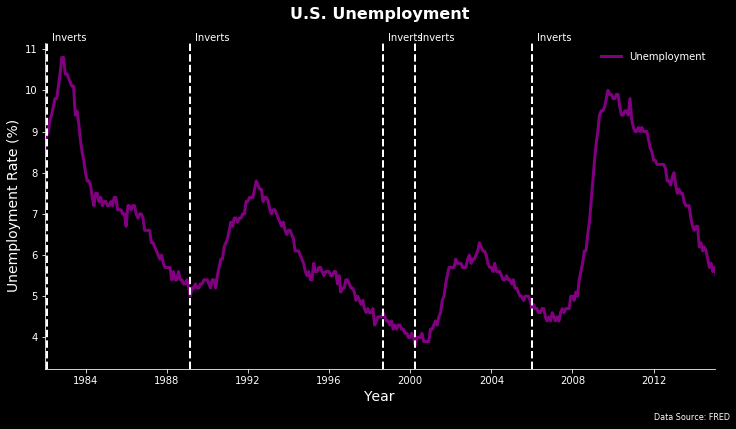

In [121]:
fig, ax = plt.subplots(figsize = (12,6))

plt.style.use('dark_background')

ax.plot(economic_indicators.index, economic_indicators.Unemployment_Rate , color = 'purple', linewidth = 3.0) 

ax.set_title("U.S. Unemployment\n", fontsize = 16, fontweight = "bold")
ax.set_ylabel("Unemployment Rate (%)", fontsize = 14,)
ax.set_xlabel("Year", fontsize = 14,)  

ax.set_xlim(dt.datetime(1982,1,1), dt.datetime(2015,1,1)) 

ax.spines["right"].set_visible(False) 
ax.spines["top"].set_visible(False) 

ax.axvline(x= dt.datetime(1982,2,1), color='white', label='Inverts', linestyle='--', linewidth=2)
ax.axvline(x= dt.datetime(1989,3,1), color='white', label='Inverts', linestyle='--', linewidth=2)
ax.axvline(x= dt.datetime(1998,9,1), color='white', label='Inverts', linestyle='--', linewidth=2)
ax.axvline(x= dt.datetime(2000,4,1), color='white', label='Inverts', linestyle='--', linewidth=2)
ax.axvline(x= dt.datetime(2006,1,1), color='white', label='Inverts', linestyle='--', linewidth=2)

ax.text(dt.datetime(1982,5,1), 11.2, "Inverts", horizontalalignment='left')
ax.text(dt.datetime(1989,6,1), 11.2, "Inverts", horizontalalignment='left')
ax.text(dt.datetime(1998,12,1), 11.2, "Inverts", horizontalalignment='left')
ax.text(dt.datetime(2000,7,1), 11.2, "Inverts", horizontalalignment='left')
ax.text(dt.datetime(2006,4,1), 11.2, "Inverts", horizontalalignment='left')

ax.legend(["Unemployment"],frameon=False)

ax.text(dt.datetime(2012,1,1), 2, "Data Source: FRED", fontsize = 8)

plt.savefig("unemployment_rate.png", bbox_inches = "tight", dip = 3000)

plt.show()

**Vehicle Sales**

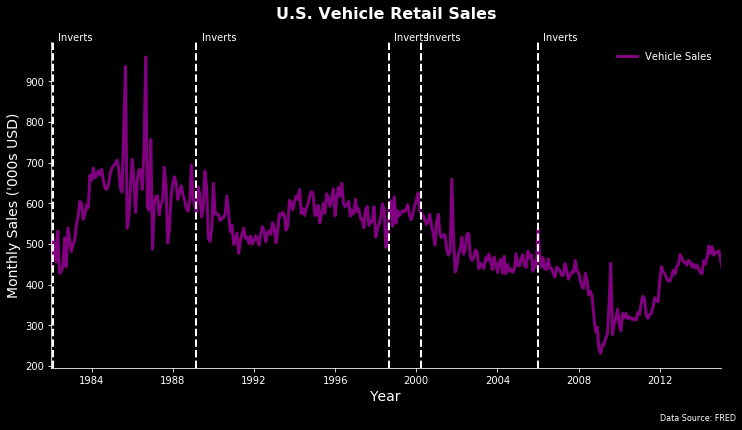

In [126]:
fig, ax = plt.subplots(figsize = (12,6))

plt.style.use('dark_background')

ax.plot(economic_indicators.index, economic_indicators.Vehicle_Sales , color = 'purple', linewidth = 3.0) 

ax.set_title("U.S. Vehicle Retail Sales\n", fontsize = 16, fontweight = "bold")
ax.set_ylabel("Monthly Sales ('000s USD)", fontsize = 14,)
ax.set_xlabel("Year", fontsize = 14,)  

ax.set_xlim(dt.datetime(1982,1,1), dt.datetime(2015,1,1)) 

ax.spines["right"].set_visible(False) 
ax.spines["top"].set_visible(False) 

ax.axvline(x= dt.datetime(1982,2,1), color='white', label='Inverts', linestyle='--', linewidth=2)
ax.axvline(x= dt.datetime(1989,3,1), color='white', label='Inverts', linestyle='--', linewidth=2)
ax.axvline(x= dt.datetime(1998,9,1), color='white', label='Inverts', linestyle='--', linewidth=2)
ax.axvline(x= dt.datetime(2000,4,1), color='white', label='Inverts', linestyle='--', linewidth=2)
ax.axvline(x= dt.datetime(2006,1,1), color='white', label='Inverts', linestyle='--', linewidth=2)

ax.text(dt.datetime(1982,5,1), 1000, "Inverts", horizontalalignment='left')
ax.text(dt.datetime(1989,6,1), 1000, "Inverts", horizontalalignment='left')
ax.text(dt.datetime(1998,12,1), 1000, "Inverts", horizontalalignment='left')
ax.text(dt.datetime(2000,7,1), 1000, "Inverts", horizontalalignment='left')
ax.text(dt.datetime(2006,4,1), 1000, "Inverts", horizontalalignment='left')

ax.legend(["Vehicle Sales"],frameon=False)

ax.text(dt.datetime(2012,1,1), 65, "Data Source: FRED", fontsize = 8)

plt.savefig("vehicle_sales.png", bbox_inches = "tight", dip = 3000)

plt.show()

**Industrial Production**

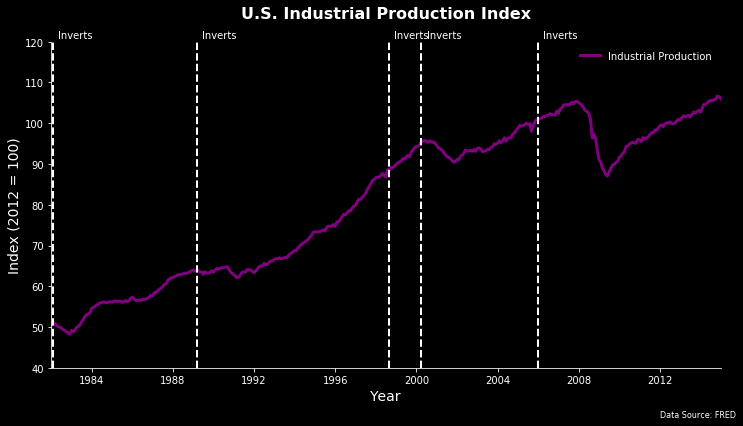

In [130]:
fig, ax = plt.subplots(figsize = (12,6))

plt.style.use('dark_background')

ax.plot(economic_indicators.index, economic_indicators.Industrial_Production , color = 'purple', linewidth = 3.0) 

ax.set_title("U.S. Industrial Production Index\n", fontsize = 16, fontweight = "bold")
ax.set_ylabel("Index (2012 = 100)", fontsize = 14,)
ax.set_xlabel("Year", fontsize = 14,)  

ax.set_xlim(dt.datetime(1982,1,1), dt.datetime(2015,1,1)) 
ax.set_ylim(40, 120) 

ax.spines["right"].set_visible(False) 
ax.spines["top"].set_visible(False) 

ax.axvline(x= dt.datetime(1982,2,1), color='white', label='Inverts', linestyle='--', linewidth=2)
ax.axvline(x= dt.datetime(1989,3,1), color='white', label='Inverts', linestyle='--', linewidth=2)
ax.axvline(x= dt.datetime(1998,9,1), color='white', label='Inverts', linestyle='--', linewidth=2)
ax.axvline(x= dt.datetime(2000,4,1), color='white', label='Inverts', linestyle='--', linewidth=2)
ax.axvline(x= dt.datetime(2006,1,1), color='white', label='Inverts', linestyle='--', linewidth=2)

ax.text(dt.datetime(1982,5,1), 121, "Inverts", horizontalalignment='left')
ax.text(dt.datetime(1989,6,1), 121, "Inverts", horizontalalignment='left')
ax.text(dt.datetime(1998,12,1), 121, "Inverts", horizontalalignment='left')
ax.text(dt.datetime(2000,7,1), 121, "Inverts", horizontalalignment='left')
ax.text(dt.datetime(2006,4,1), 121, "Inverts", horizontalalignment='left')

ax.legend(["Industrial Production"],frameon=False)

ax.text(dt.datetime(2012,1,1), 28, "Data Source: FRED", fontsize = 8)

plt.savefig("industrial_production.png", bbox_inches = "tight", dip = 3000)

plt.show()

**Fed Funds Rate**

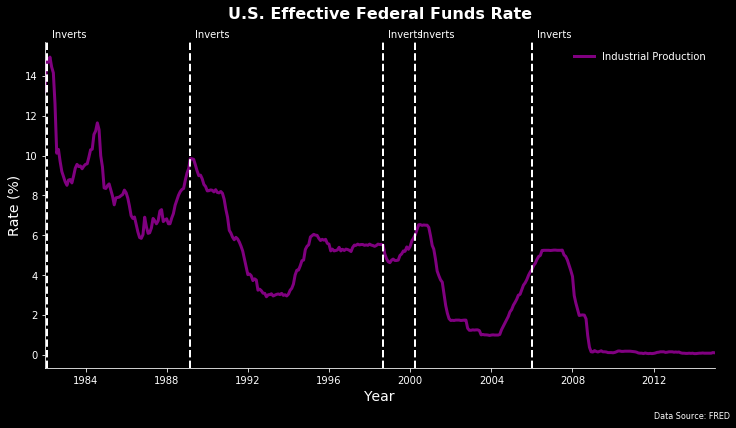

In [134]:
fig, ax = plt.subplots(figsize = (12,6))

plt.style.use('dark_background')

ax.plot(economic_indicators.index, economic_indicators.Fed_Funds , color = 'purple', linewidth = 3.0) 

ax.set_title("U.S. Effective Federal Funds Rate\n", fontsize = 16, fontweight = "bold")
ax.set_ylabel("Rate (%)", fontsize = 14,)
ax.set_xlabel("Year", fontsize = 14,)  

ax.set_xlim(dt.datetime(1982,1,1), dt.datetime(2015,1,1)) 

ax.spines["right"].set_visible(False) 
ax.spines["top"].set_visible(False) 

ax.axvline(x= dt.datetime(1982,2,1), color='white', label='Inverts', linestyle='--', linewidth=2)
ax.axvline(x= dt.datetime(1989,3,1), color='white', label='Inverts', linestyle='--', linewidth=2)
ax.axvline(x= dt.datetime(1998,9,1), color='white', label='Inverts', linestyle='--', linewidth=2)
ax.axvline(x= dt.datetime(2000,4,1), color='white', label='Inverts', linestyle='--', linewidth=2)
ax.axvline(x= dt.datetime(2006,1,1), color='white', label='Inverts', linestyle='--', linewidth=2)

ax.text(dt.datetime(1982,5,1), 15.9, "Inverts", horizontalalignment='left')
ax.text(dt.datetime(1989,6,1), 15.9, "Inverts", horizontalalignment='left')
ax.text(dt.datetime(1998,12,1), 15.9, "Inverts", horizontalalignment='left')
ax.text(dt.datetime(2000,7,1), 15.9, "Inverts", horizontalalignment='left')
ax.text(dt.datetime(2006,4,1), 15.9, "Inverts", horizontalalignment='left')

ax.legend(["Industrial Production"],frameon=False)

ax.text(dt.datetime(2012,1,1), -3.2, "Data Source: FRED", fontsize = 8)

plt.savefig("industrial_production.png", bbox_inches = "tight", dip = 3000)

plt.show()

**1982 Inversion**

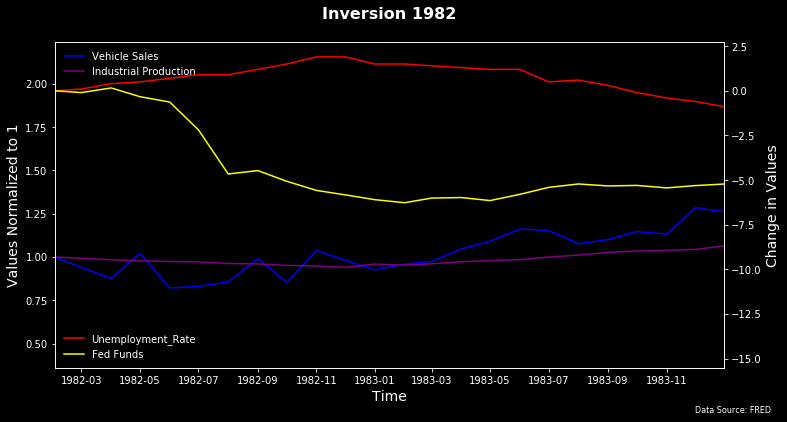

In [37]:
fig, ax1 = plt.subplots(figsize=(12,6))

ax1.plot(inversion_1982.index, inversion_1982['Vehicle_Sales'], 
        color = 'blue', label = 'Vehicle Sales', alpha = 1)
ax1.plot(inversion_1982.index, inversion_1982['Industrial_Production'], 
        color = 'purple', label = 'Industrial Production', alpha = 1)

ax1.set_ylabel("Values Normalized to 1", fontsize = 14,)
ax1.legend(frameon=False, loc = 'upper left')
ax1.set_xlabel("Time", fontsize = 14,) 

ax2 = ax1.twinx()

ax2.plot(inversion_1982.index, inversion_1982['Unemployment_Rate'], 
        color = 'red', label = 'Unemployment_Rate', alpha = 1)
ax2.plot(inversion_1982.index, inversion_1982['Fed_Funds'], 
        color = 'yellow', label = 'Fed Funds', alpha = 1)

ax2.set_title('Inversion 1982\n', fontsize = 16, fontweight = "bold")
ax2.set_ylabel("Change in Values", fontsize = 14,)
ax2.set_xlim(dt.datetime(1982,2,1), dt.datetime(1983, 12, 31) )
ax2.legend(frameon=False)

ax1.text(dt.datetime(1983,12,1), 0.1, "Data Source: FRED", fontsize = 8)

plt.savefig("inversion_1982.png", bbox_inches = "tight", dip = 3000)

plt.show()

As shown, the 1982 inversion was followed by a period of moderate economic setbacks.

**1989 Inversion**

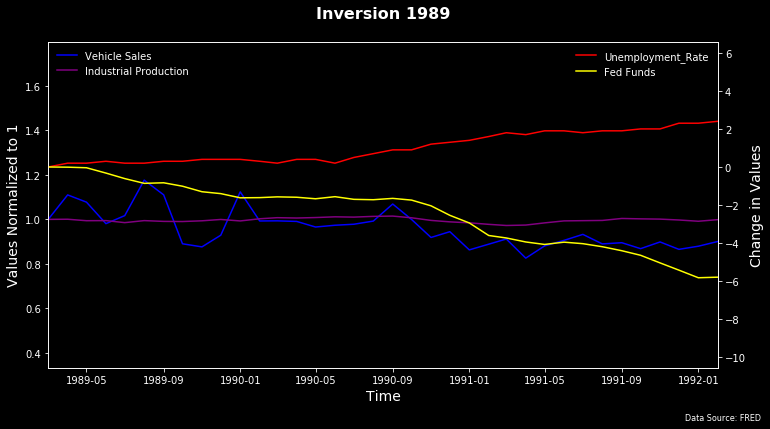

In [38]:
fig, ax1 = plt.subplots(figsize=(12,6))

ax1.plot(inversion_1989.index, inversion_1989['Vehicle_Sales'], 
        color = 'blue', label = 'Vehicle Sales', alpha = 1)
ax1.plot(inversion_1989.index, inversion_1989['Industrial_Production'], 
        color = 'purple', label = 'Industrial Production', alpha = 1)

ax1.set_ylabel("Values Normalized to 1", fontsize = 14,)
ax1.legend(frameon=False, loc = 'upper left')
ax1.set_xlabel("Time", fontsize = 14,) 

ax2 = ax1.twinx()

ax2.plot(inversion_1989.index, inversion_1989['Unemployment_Rate'], 
        color = 'red', label = 'Unemployment_Rate', alpha = 1)
ax2.plot(inversion_1989.index, inversion_1989['Fed_Funds'], 
        color = 'yellow', label = 'Fed Funds', alpha = 1)

ax2.set_title('Inversion 1989\n', fontsize = 16, fontweight = "bold")
ax2.set_ylabel("Change in Values", fontsize = 14,)
ax2.set_xlim(dt.datetime(1989,3,1), dt.datetime(1992, 2, 1))
ax2.legend(frameon=False)

ax1.text(dt.datetime(1991,12,10), 0.1, "Data Source: FRED", fontsize = 8)

plt.savefig("inversion_1989.png", bbox_inches = "tight", dip = 3000)

plt.show()

As showed by the graph above, the 1989 inversion was followed by a slight recession. 

**1998 Inversion**

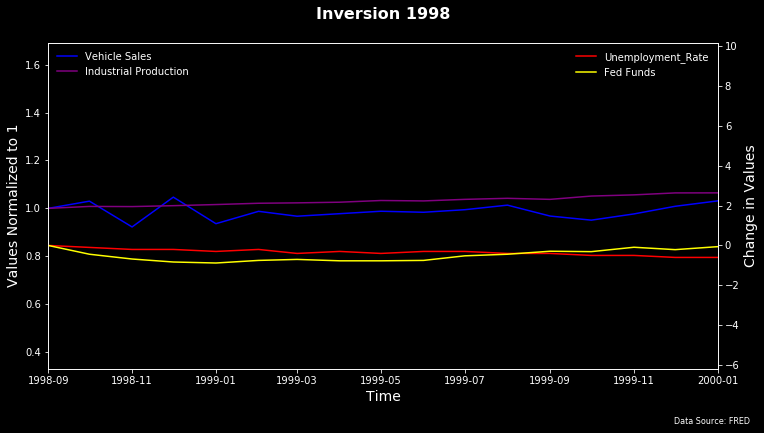

In [39]:
fig, ax1 = plt.subplots(figsize=(12,6))

ax1.plot(inversion_1998.index, inversion_1998['Vehicle_Sales'], 
        color = 'blue', label = 'Vehicle Sales', alpha = 1)
ax1.plot(inversion_1998.index, inversion_1998['Industrial_Production'], 
        color = 'purple', label = 'Industrial Production', alpha = 1)

ax1.set_ylabel("Values Normalized to 1", fontsize = 14,)
ax1.legend(frameon=False, loc = 'upper left')
ax1.set_xlabel("Time", fontsize = 14,) 

ax2 = ax1.twinx()

ax2.plot(inversion_1998.index, inversion_1998['Unemployment_Rate'], 
        color = 'red', label = 'Unemployment_Rate', alpha = 1)
ax2.plot(inversion_1998.index, inversion_1998['Fed_Funds'], 
        color = 'yellow', label = 'Fed Funds', alpha = 1)

ax2.set_title('Inversion 1998\n', fontsize = 16, fontweight = "bold")
ax2.set_ylabel("Change in Values", fontsize = 14,)
ax2.set_xlim(dt.datetime(1998,9,1), dt.datetime(2000, 1, 1))
ax2.legend(frameon=False)

ax1.text(dt.datetime(1999,11,30), 0.1, "Data Source: FRED", fontsize = 8)

plt.savefig("inversion_1998.png", bbox_inches = "tight", dip = 3000)

plt.show()

As we can see above, the inversion in 1998 did not have any significant effect in the economy. This is in line with what the plots of the individual economic indicators show. After the 1998 inversion, there was no sign of a negative impact on indicators.

**2000-2001 Inversion**

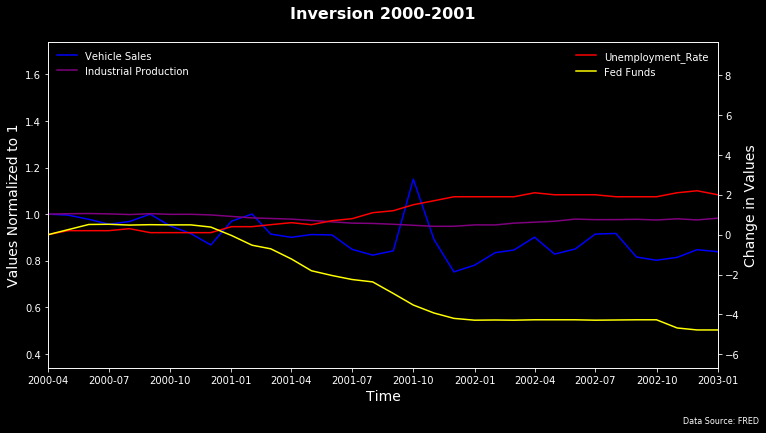

In [43]:
fig, ax1 = plt.subplots(figsize=(12,6))

ax1.plot(inversion_2000.index, inversion_2000['Vehicle_Sales'], 
        color = 'blue', label = 'Vehicle Sales', alpha = 1)
ax1.plot(inversion_2000.index, inversion_2000['Industrial_Production'], 
        color = 'purple', label = 'Industrial Production', alpha = 1)

ax1.set_ylabel("Values Normalized to 1", fontsize = 14,)
ax1.legend(frameon=False, loc = 'upper left')
ax1.set_xlabel("Time", fontsize = 14,) 

ax2 = ax1.twinx()

ax2.plot(inversion_2000.index, inversion_2000['Unemployment_Rate'], 
        color = 'red', label = 'Unemployment_Rate', alpha = 1)
ax2.plot(inversion_2000.index, inversion_2000['Fed_Funds'], 
        color = 'yellow', label = 'Fed Funds', alpha = 1)

ax2.set_title('Inversion 2000-2001\n', fontsize = 16, fontweight = "bold")
ax2.set_ylabel("Change in Values", fontsize = 14,)
ax2.set_xlim(dt.datetime(2000,4,1), dt.datetime(2003, 1, 1))
ax2.legend(frameon=False)

ax1.text(dt.datetime(2002,11,10), 0.1, "Data Source: FRED", fontsize = 8)

plt.savefig("inversion_2000.png", bbox_inches = "tight", dip = 3000)

plt.show()

The inversion of 2000-2001, as shown above, was followed a moderate period of economic decline. This period is commonly referred to as the Dotcom bust which was preceded by the dotcom bubble.

**2006-2007 Inversion**

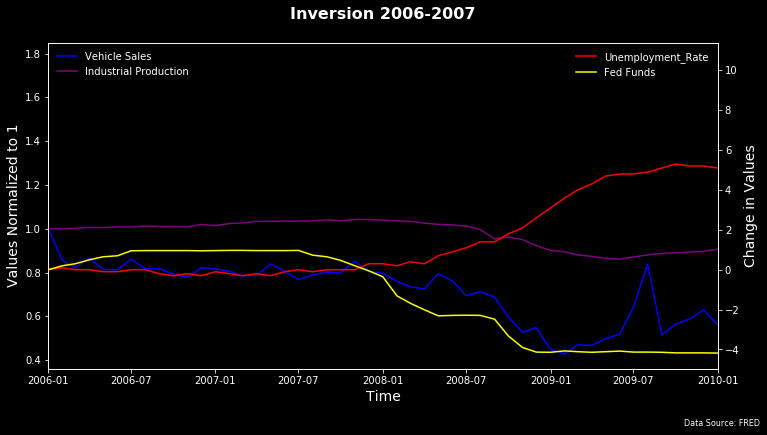

In [42]:
fig, ax1 = plt.subplots(figsize=(12,6))

ax1.plot(inversion_2006.index, inversion_2006['Vehicle_Sales'], 
        color = 'blue', label = 'Vehicle Sales', alpha = 1)
ax1.plot(inversion_2006.index, inversion_2006['Industrial_Production'], 
        color = 'purple', label = 'Industrial Production', alpha = 1)

ax1.set_ylabel("Values Normalized to 1", fontsize = 14,)
ax1.legend(frameon=False, loc = 'upper left')
ax1.set_xlabel("Time", fontsize = 14,) 

ax2 = ax1.twinx()

ax2.plot(inversion_2006.index, inversion_2006['Unemployment_Rate'], 
        color = 'red', label = 'Unemployment_Rate', alpha = 1)
ax2.plot(inversion_2006.index, inversion_2006['Fed_Funds'], 
        color = 'yellow', label = 'Fed Funds', alpha = 1)

ax2.set_title('Inversion 2006-2007\n', fontsize = 16, fontweight = "bold")
ax2.set_ylabel("Change in Values", fontsize = 14,)
ax2.set_xlim(dt.datetime(2006,1,1), dt.datetime(2010, 1, 1))
ax2.legend(frameon=False)

ax1.text(dt.datetime(2009,10,20), 0.1, "Data Source: FRED", fontsize = 8)

plt.savefig("inversion_2006.png", bbox_inches = "tight", dip = 3000)

plt.show()

As shown above, the inversion in 2006-2007 was followed by one of the most drastic economic declines in U.S. history. This explains why the Unemployment Rate skyrocketed at such as steep angle and the Fed Funds Rate, Vehicle Sales, and Industrial Production steeply fell.

**Delay Time**

Now that the relationship between the Yield Curve and the economy has been established, it would be useful to determine how long it takes from the time the Curve inverts until the economy is affected. To do this, I will create a bar chart with the average time it took each economic indicator to experience a decline (or increase if Unemployment Rate) in growth after the first time an inversion in the Yield Curve occured.

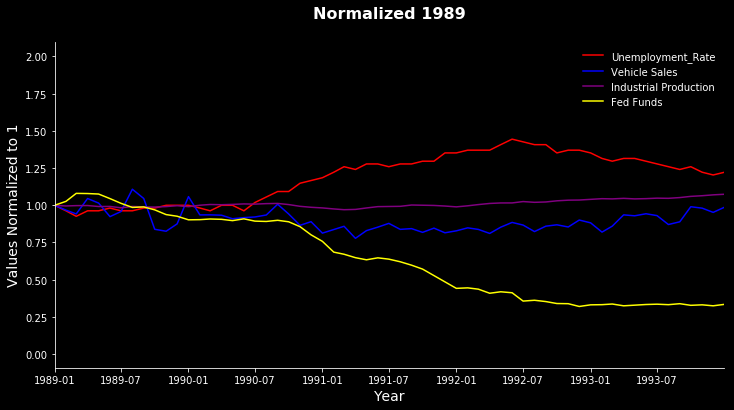

In [20]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(normalized_1989.index, normalized_1989['Unemployment_Rate'], 
        color = 'red', label = 'Unemployment_Rate', alpha = 1)
ax.plot(normalized_1989.index, normalized_1989['Vehicle_Sales'], 
        color = 'blue', label = 'Vehicle Sales', alpha = 1)
ax.plot(normalized_1989.index, normalized_1989['Industrial_Production'], 
        color = 'purple', label = 'Industrial Production', alpha = 1)
ax.plot(normalized_1989.index, normalized_1989['Fed_Funds'], 
        color = 'yellow', label = 'Fed Funds', alpha = 1)

ax.set_xlim(dt.datetime(1989,1,1), dt.datetime(1993, 12, 31) )

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_title('Normalized 1989\n', fontsize = 16, fontweight = "bold")
ax.set_ylabel("Values Normalized to 1", fontsize = 14,)
ax.set_xlabel("Year", fontsize = 14,) 

plt.savefig("normalized_1989.png", bbox_inches = "tight", dip = 3000)

ax.legend(frameon=False)

plt.show()